# Initializer Comparison with Sigmoid Activation

In [1]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import OrderedDict

In [2]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, din):
        dx = np.dot(din, self.W.T)
        self.dW = np.dot(self.x.T, din)
        self.db = np.sum(din, axis=0)
        return dx

In [3]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, din):
        dx = din * self.out * (1.0 - self.out)
        return dx
    
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, din):
        din[self.mask] = 0
        dx = din
        return dx

## Five layers and Activation Values

In [4]:
def activation_value_histogram(layers, num_epoch):
    x = np.random.randn(1000, 100) # 1000 x 100
    y = np.ones((1000, 100))

    num_layers = len(layers)
    activations = OrderedDict()
    backward_activations = OrderedDict()
    
    avg_forward_std = []
    avg_backward_std = []

    for epoch in range(num_epoch):
        print("Epoch:", epoch)
        # Forward
        for i in range(num_layers):
            if i != 0:
                x = activations[i-1]
            activations[i] = layers[i].forward(x)

        # Backward    
        for i in reversed(range(num_layers)):
            if i != num_layers - 1:
                y = backward_activations[i+1]
            backward_activations[i] = layers[i].backward(y)

        # Parameter Update
        for i in range(num_layers):
            if i % 2 == 0:
                layers[i].W = layers[i].W - 0.01 * layers[i].dW
                layers[i].b = layers[i].b - 0.01 * layers[i].db

        # Histograms of Forward Activation Values
        print("Forward Activations")
        forward_std_sum = 0.0
        f, axarr = plt.subplots(1, num_layers, figsize=(25, 5))
        for i, a in activations.items():
            values = a.flatten()
            std = "{:5.4f}".format(np.std(values))
            forward_std_sum += float(std)
            axarr[i].hist(values, 20)
            if i % 2 == 0:
                axarr[i].set_title(str(i+1) + "-Layer ($\sigma=$" + std + ")")
            else:
                axarr[i].set_title("Sigmoid Layer ($\sigma=$" + std + ")")
        avg_forward_std.append(forward_std_sum / num_layers)       
        f.subplots_adjust(wspace=0.5)
        plt.show()

        # Histograms of Backward Activation Values    
        print("Backward Activations")
        backward_std_sum = 0.0
        f, axarr = plt.subplots(1, num_layers, figsize=(25, 5))
        for i, b in backward_activations.items():
            values2 = b.flatten()
            std = "{:5.4f}".format(np.std(values2))
            backward_std_sum += float(std)
            axarr[i].hist(values2, 20)
            if i % 2 == 0:
                axarr[i].set_title(str(i+1) + "-Layer ($\sigma=$" + std + ")")
            else:
                axarr[i].set_title("Sigmoid Layer ($\sigma=$" + std + ")")
        avg_backward_std.append(backward_std_sum / num_layers)        
        f.subplots_adjust(wspace=0.5)
        plt.show()
    return avg_forward_std, avg_backward_std

## 1. Weight and Bias Variation with Sigmoid Activation

In [5]:
markers = {"Zero": "o", "N(0.0, 1.0)": "x", "N(0.0, 0.0001)": "s", "Xavier": "o", "He": "x"}

avg_forward_std_dic = OrderedDict()
avg_backward_std_dic = OrderedDict()

### 1) Only Zero Values
- Weight Distribution: $W = 0$
- Bias Distribution: $B = 0$

Epoch: 0
Forward Activations


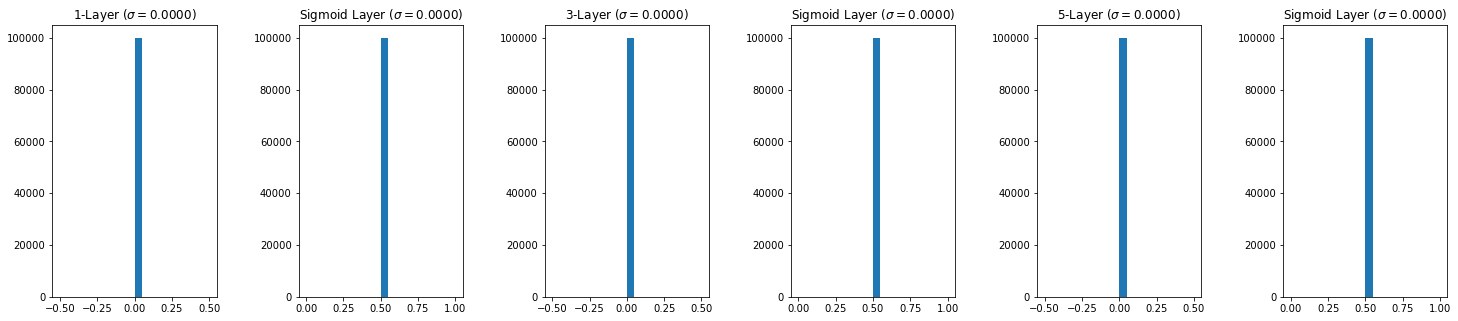

Backward Activations


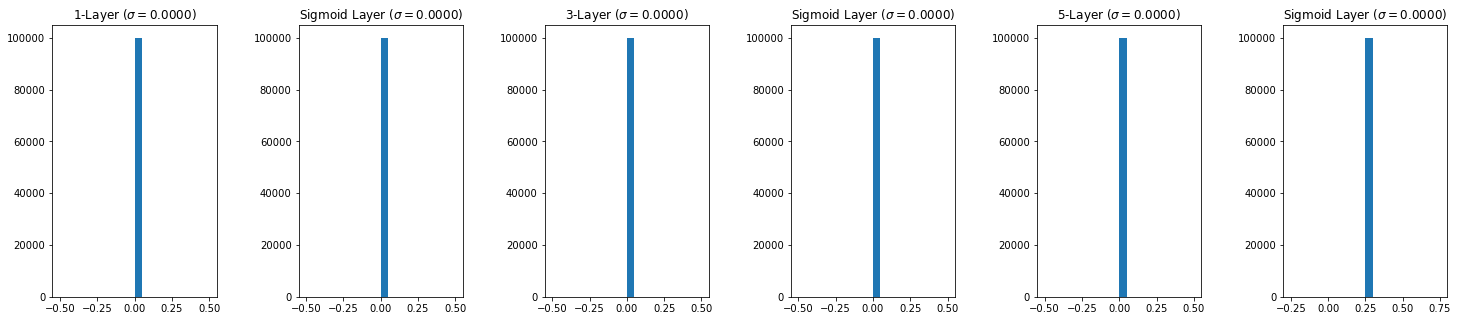

Epoch: 1
Forward Activations


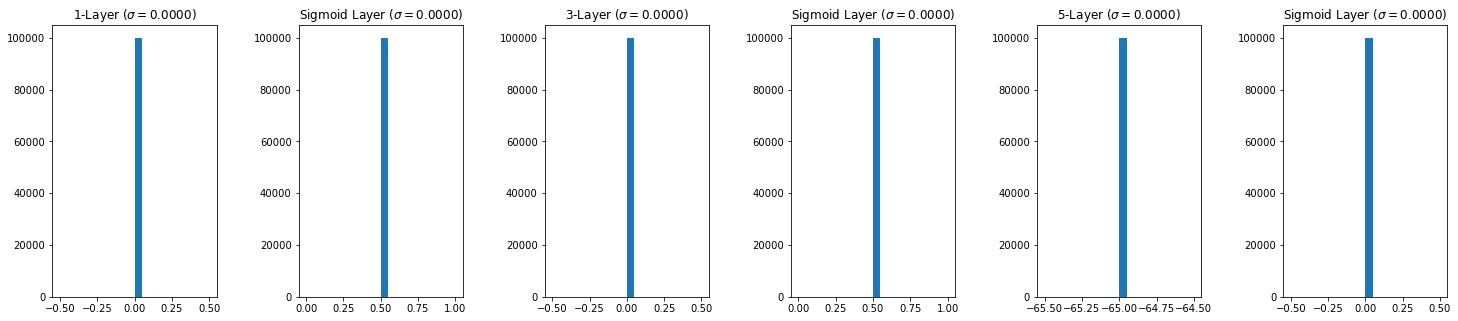

Backward Activations


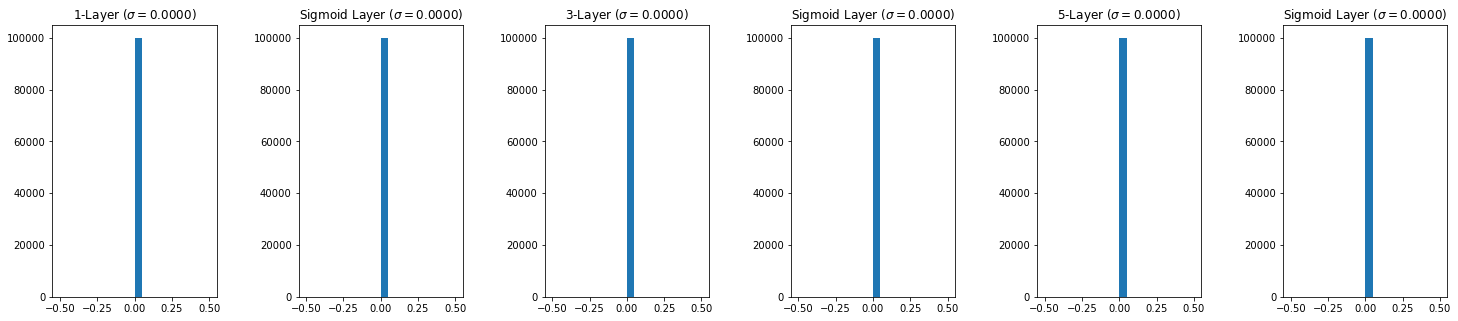

Epoch: 2
Forward Activations


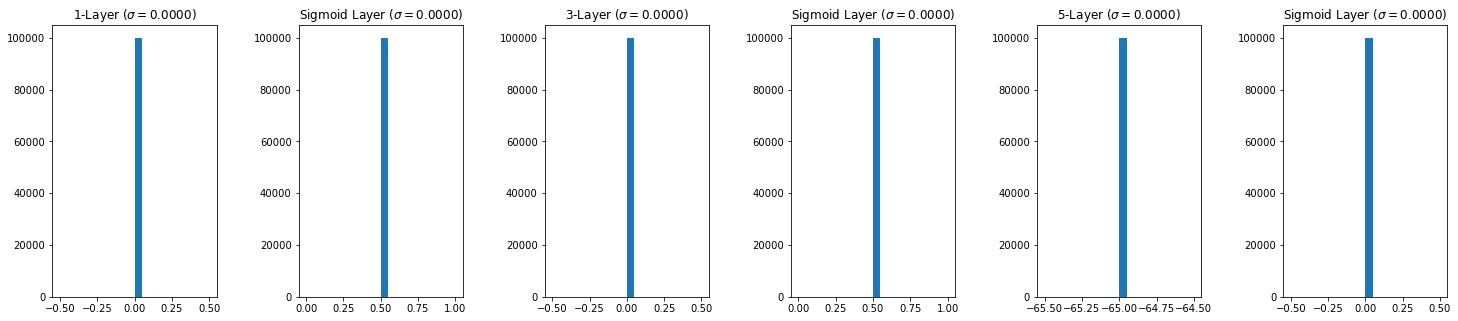

Backward Activations


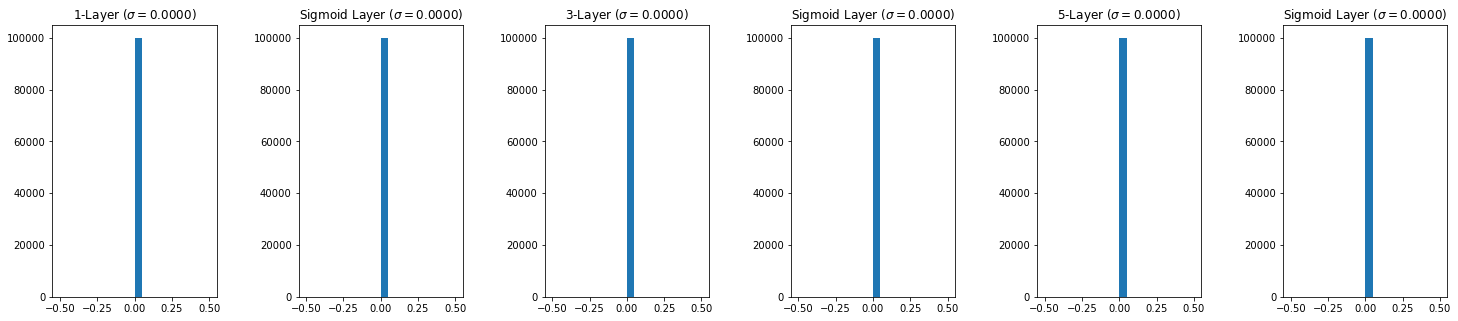

Epoch: 3
Forward Activations


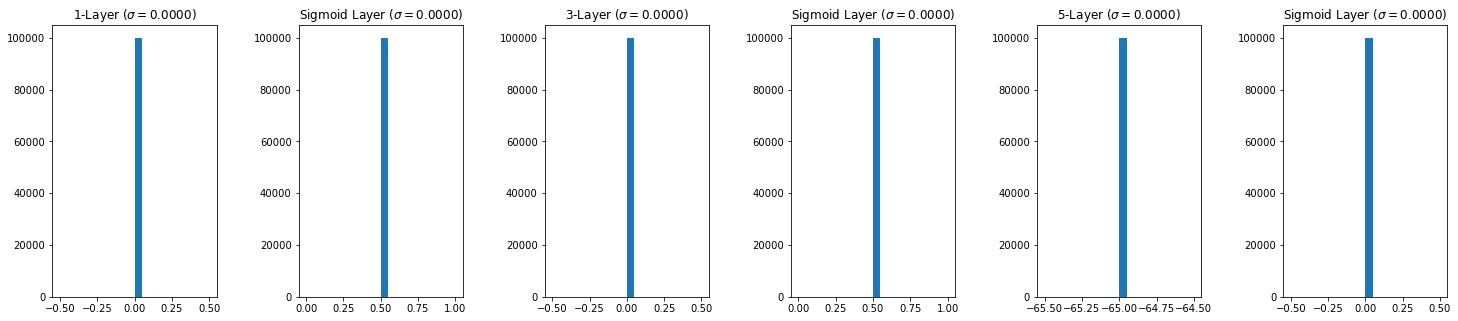

Backward Activations


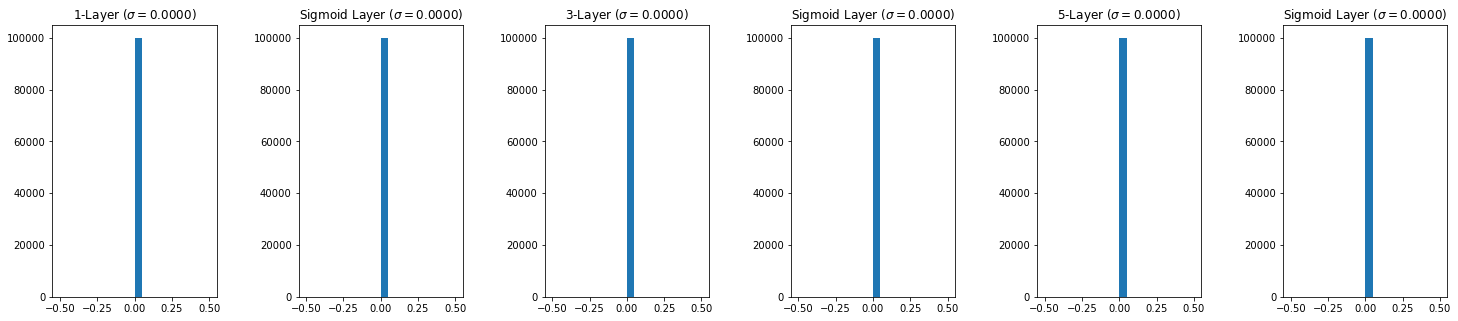

Epoch: 4
Forward Activations


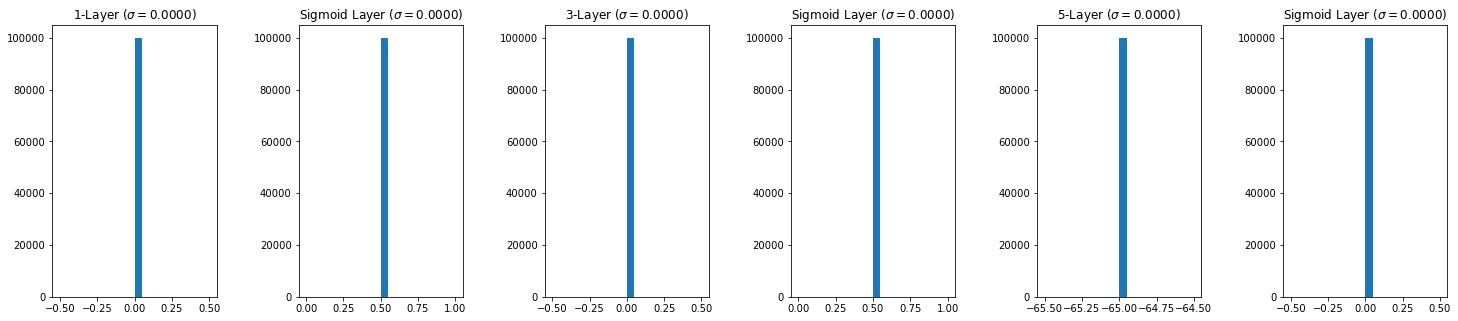

Backward Activations


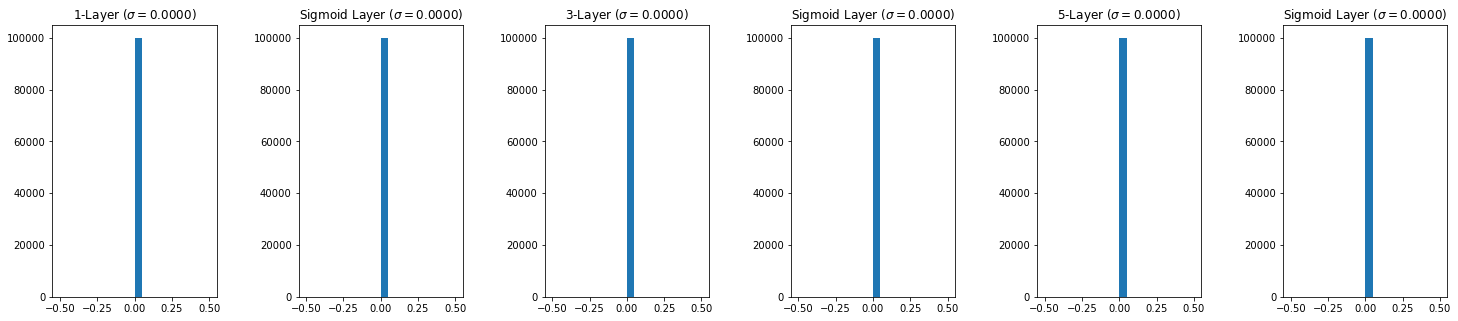

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


In [14]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.zeros((node_num, node_num))
        b = np.zeros(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Sigmoid()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['Zero'] = avg_forward_std
avg_backward_std_dic['Zero'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 2) Standard Normal Distribution
- Weight Distribution: $W \sim N(0, 1)$
- Bias Distribution: $B \sim N(0, 1)$

Epoch: 0
Forward Activations


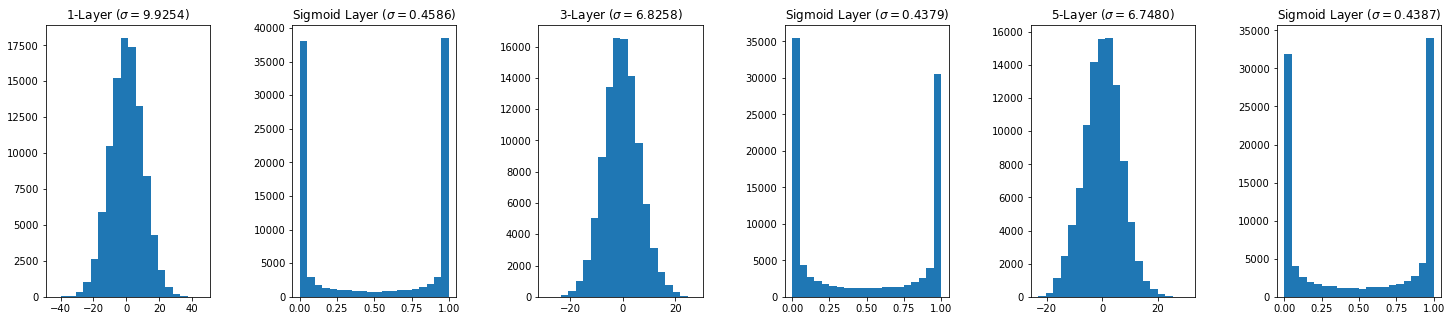

Backward Activations


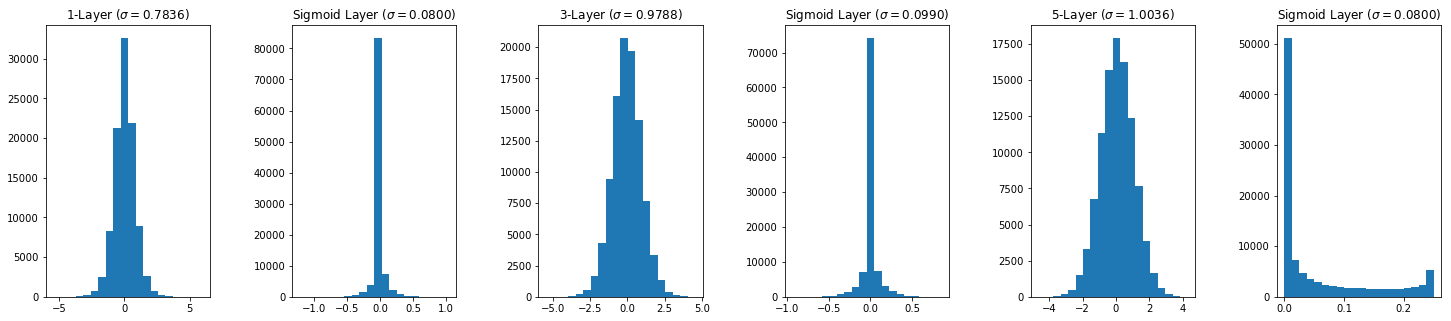

Epoch: 1
Forward Activations


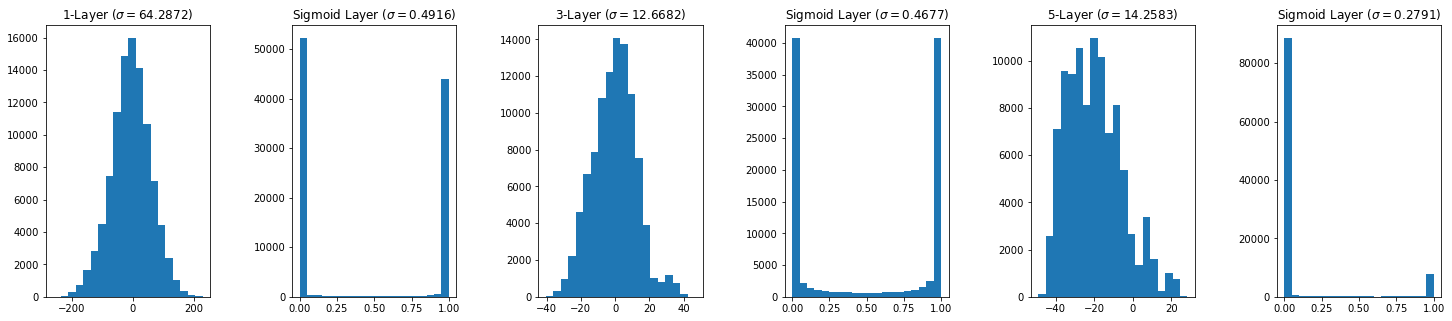

Backward Activations


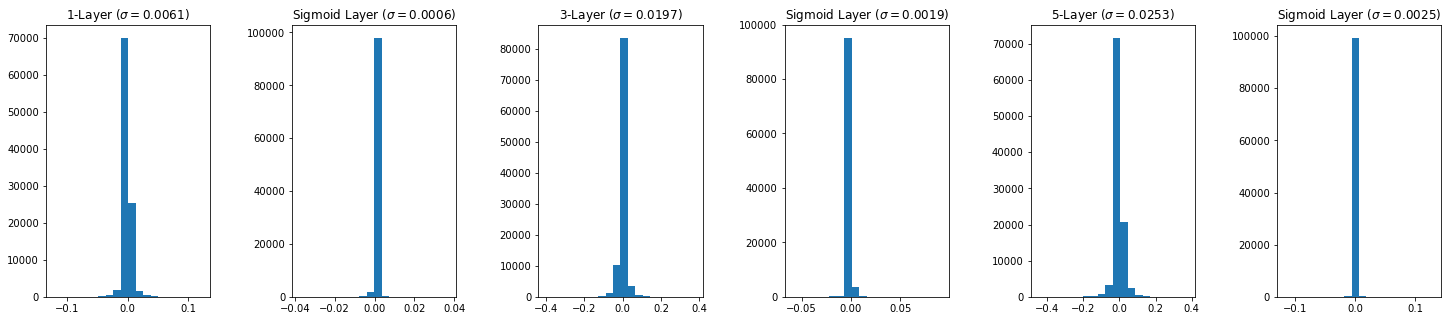

Epoch: 2
Forward Activations


/Users/yhhan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


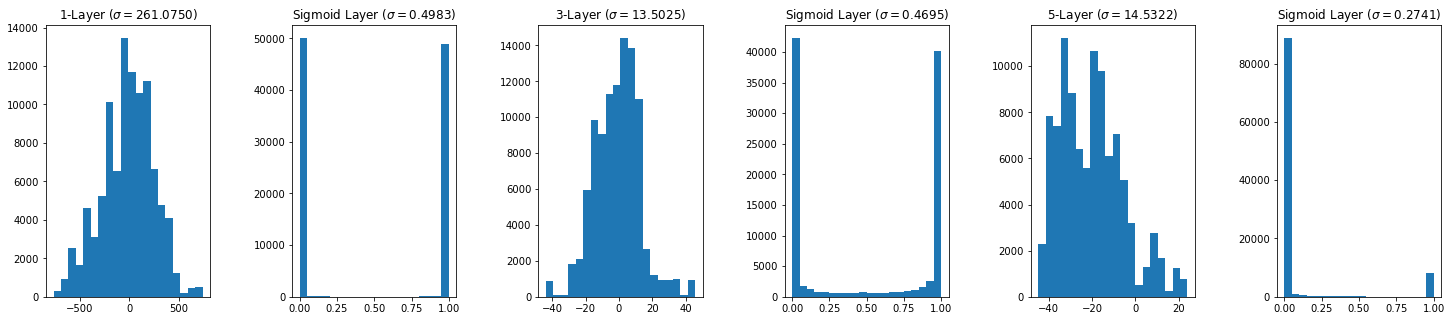

Backward Activations


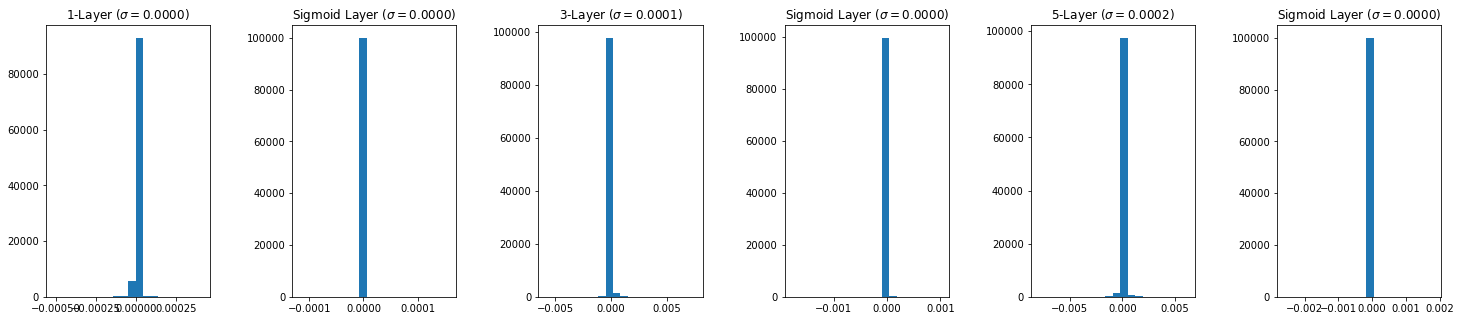

Epoch: 3
Forward Activations


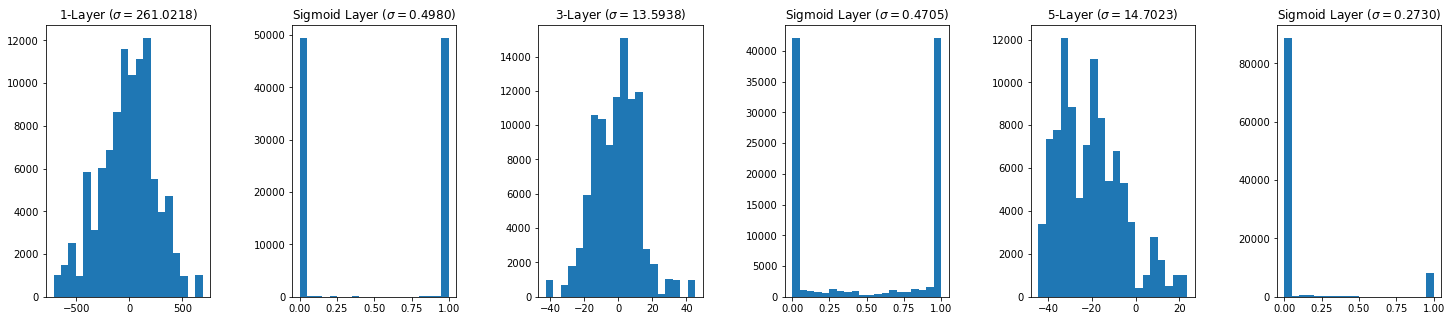

Backward Activations


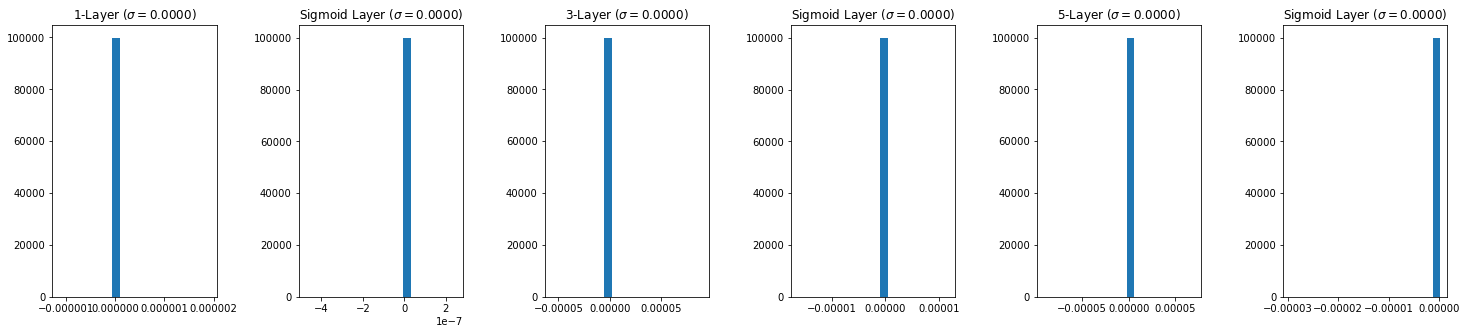

Epoch: 4
Forward Activations


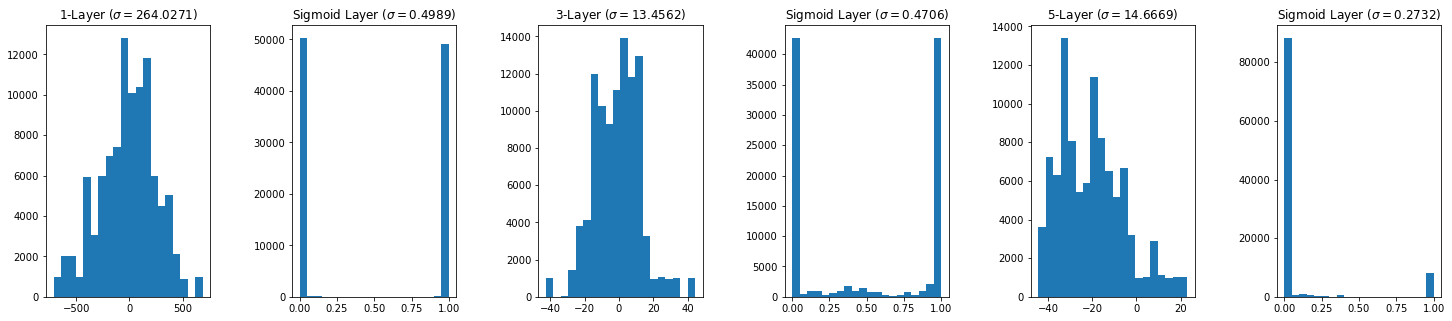

Backward Activations


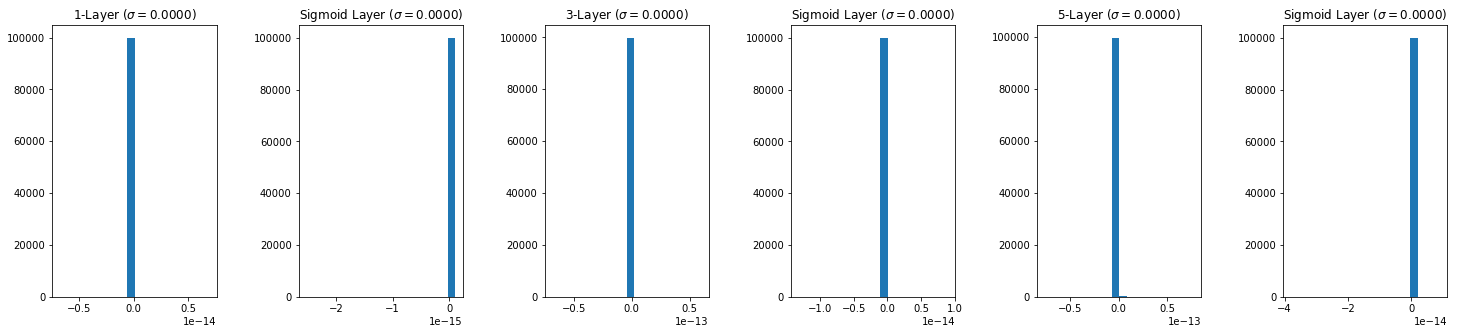

[4.139066666666667, 15.408683333333334, 48.39193333333332, 48.426566666666666, 48.89881666666667]
[0.5041666666666667, 0.00935, 5e-05, 0.0, 0.0]


In [7]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num)
        b = np.random.randn(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Sigmoid()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['N(0.0, 1.0)'] = avg_forward_std
avg_backward_std_dic['N(0.0, 1.0)'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 3) Standard Normal Distribution where Standard Deviation is 0.01 
- Weight Distribution: $W \sim N(0, 0.0001)$
- Bias Distribution: $B \sim N(0, 0.0001)$

Epoch: 0
Forward Activations


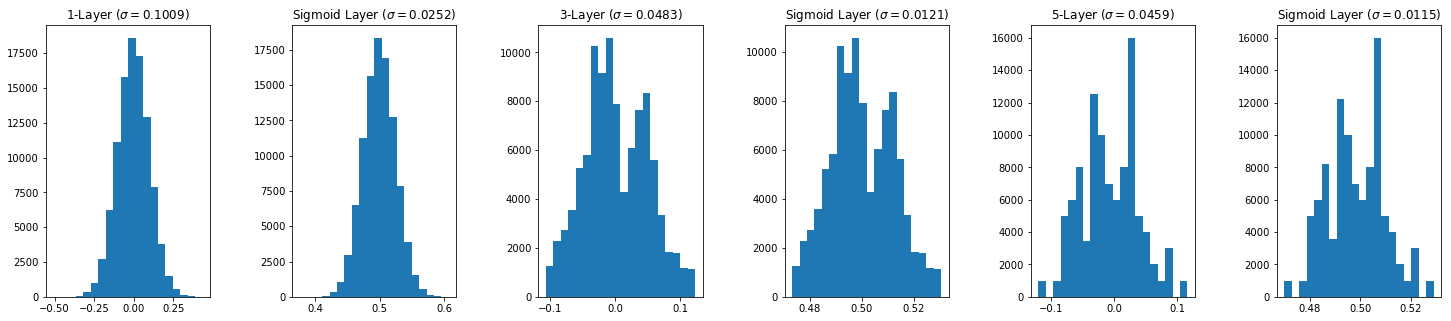

Backward Activations


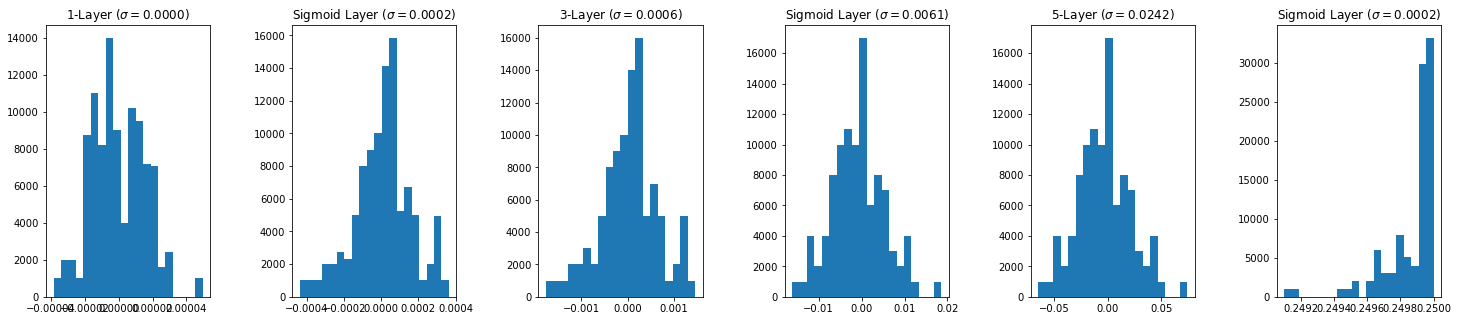

Epoch: 1
Forward Activations


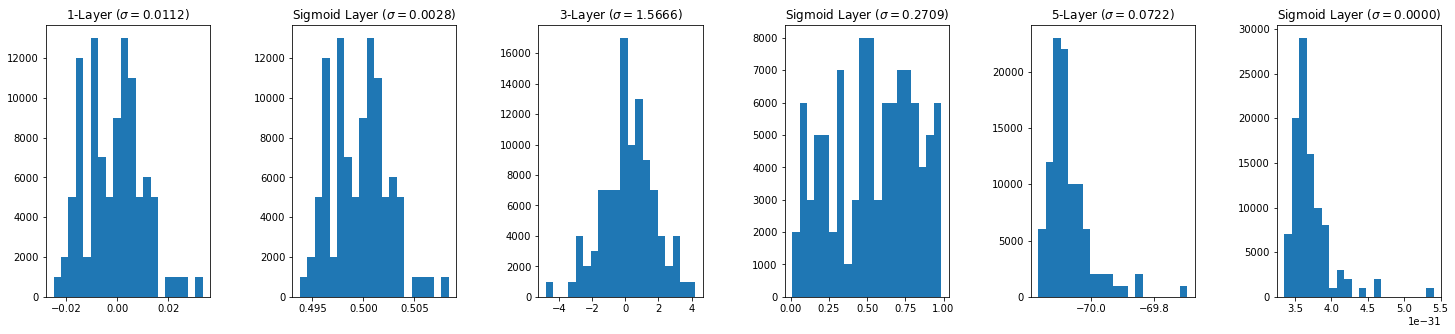

Backward Activations


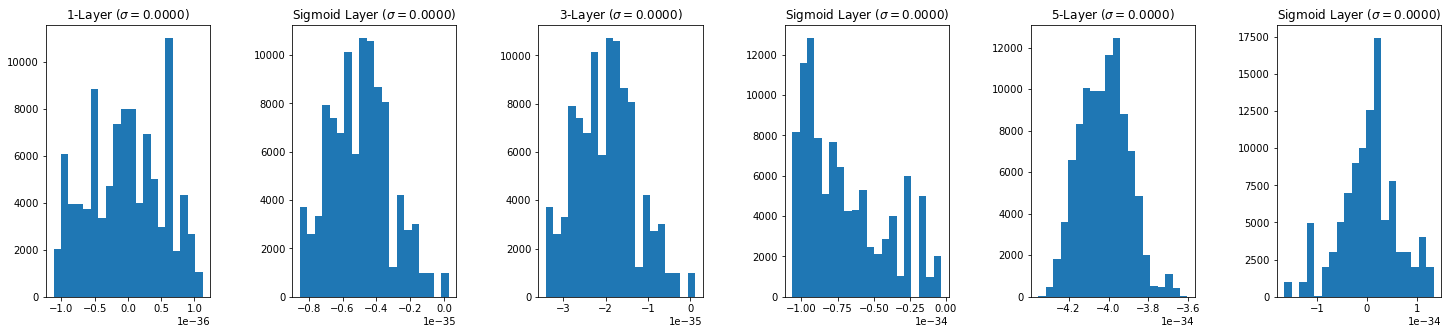

Epoch: 2
Forward Activations


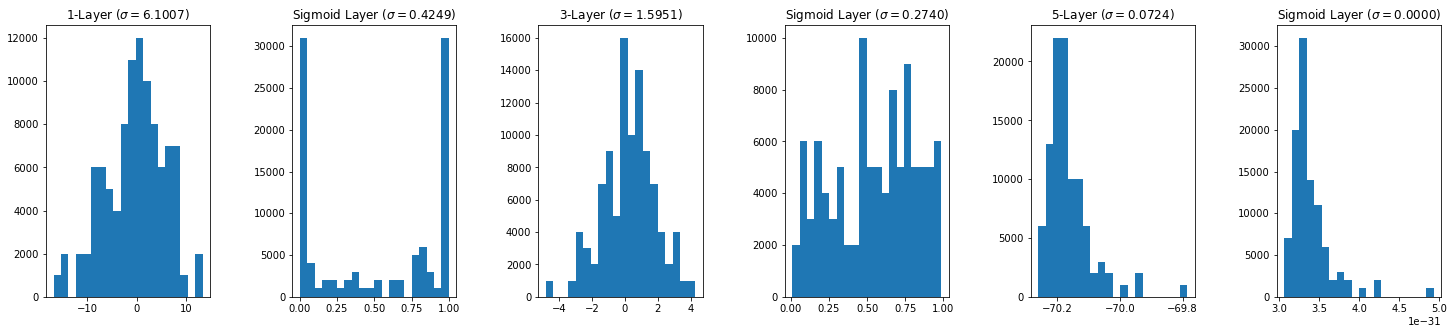

Backward Activations


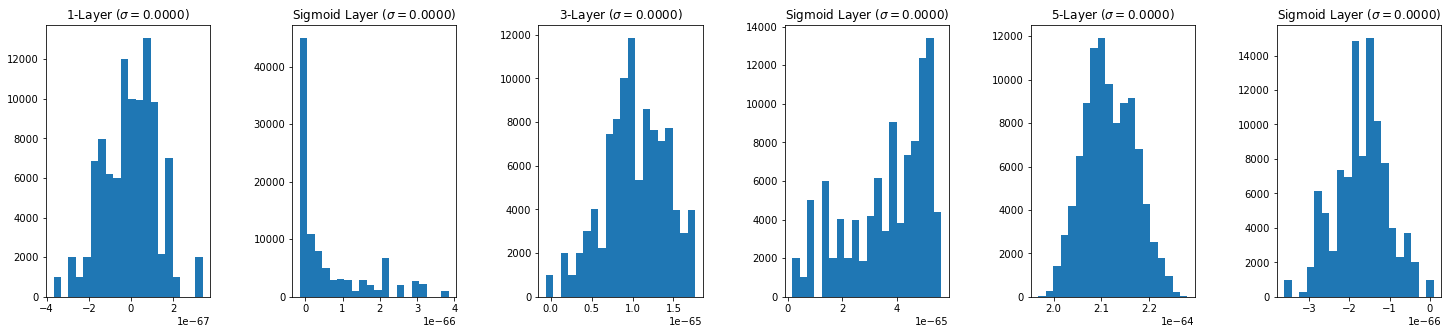

Epoch: 3
Forward Activations


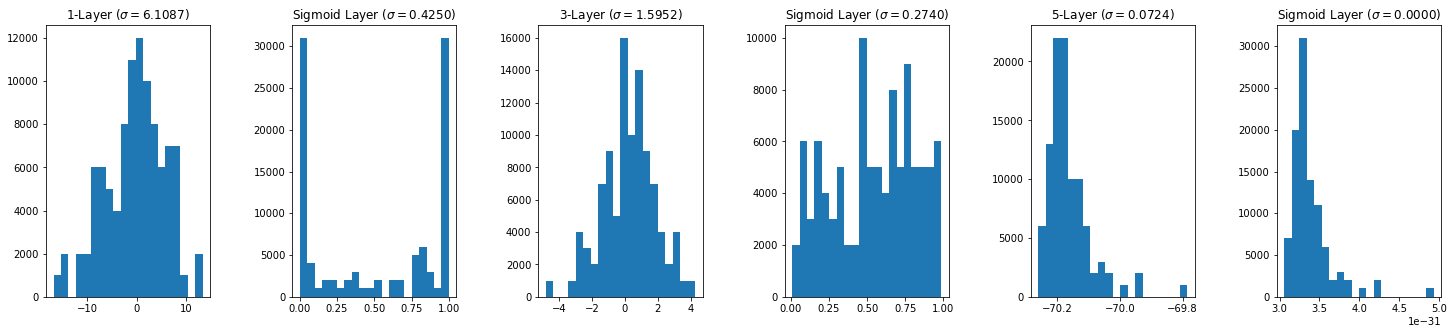

Backward Activations


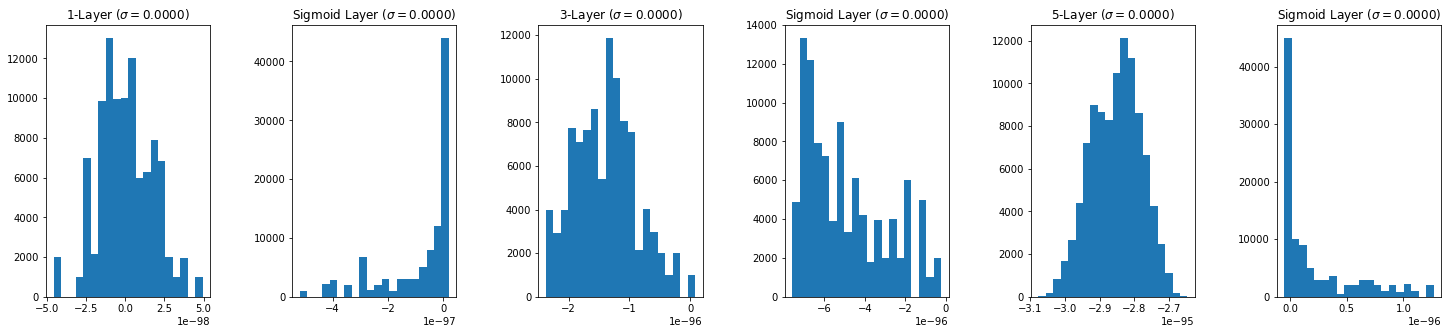

Epoch: 4
Forward Activations


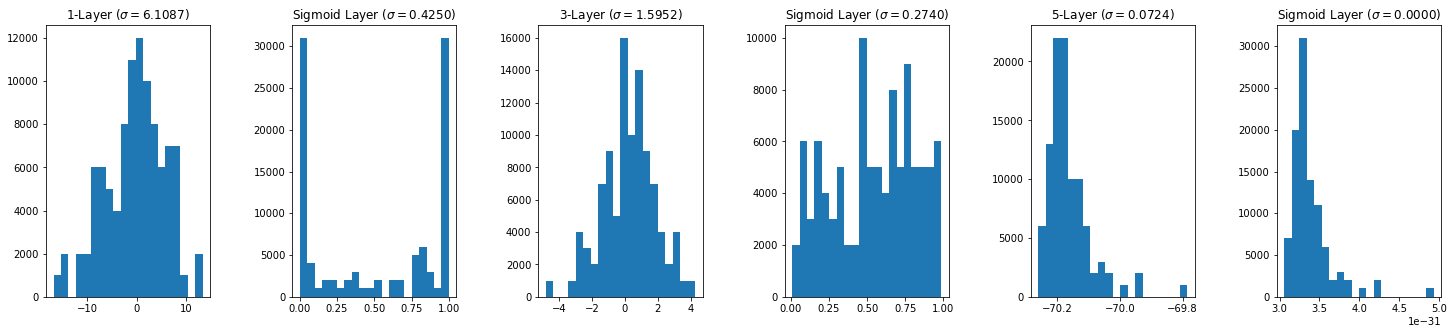

Backward Activations


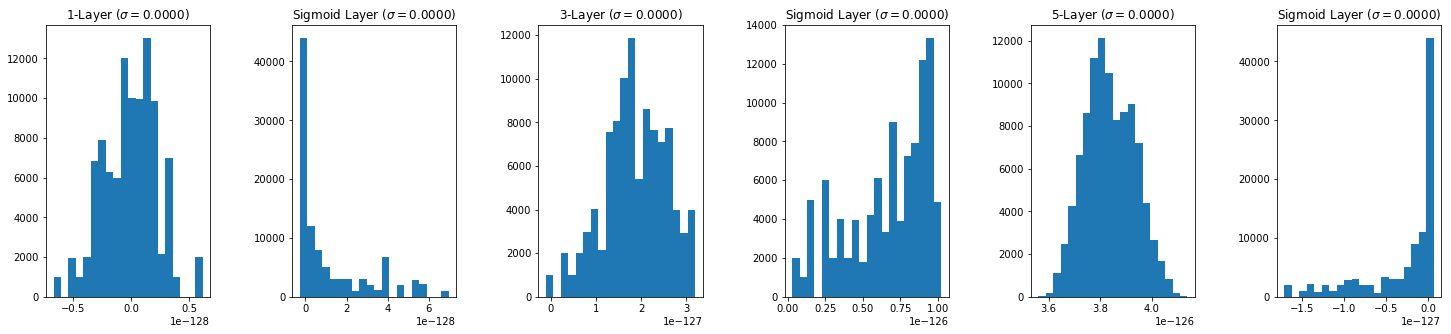

[0.04065, 0.32061666666666666, 1.4111833333333335, 1.4125499999999998, 1.4125499999999998]
[0.005216666666666667, 0.0, 0.0, 0.0, 0.0]


In [8]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num) * 0.01
        b = np.random.randn(node_num) * 0.01
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Sigmoid()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['N(0.0, 0.0001)'] = avg_forward_std
avg_backward_std_dic['N(0.0, 0.0001)'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 4) Xavier Initializer where Standard Deviation is $1 \over \sqrt{n}$ ($n$ is the number of neurons in the previous layer)
- Weight Distribution: $W \sim N(0, {1 \over n})$
- Bias Distribution: $B \sim N(0, {1 \over n})$

Epoch: 0
Forward Activations


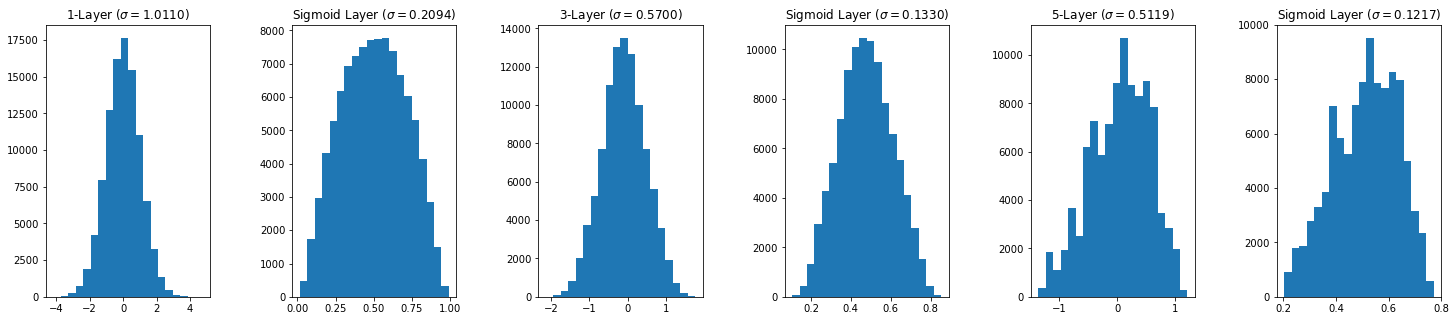

Backward Activations


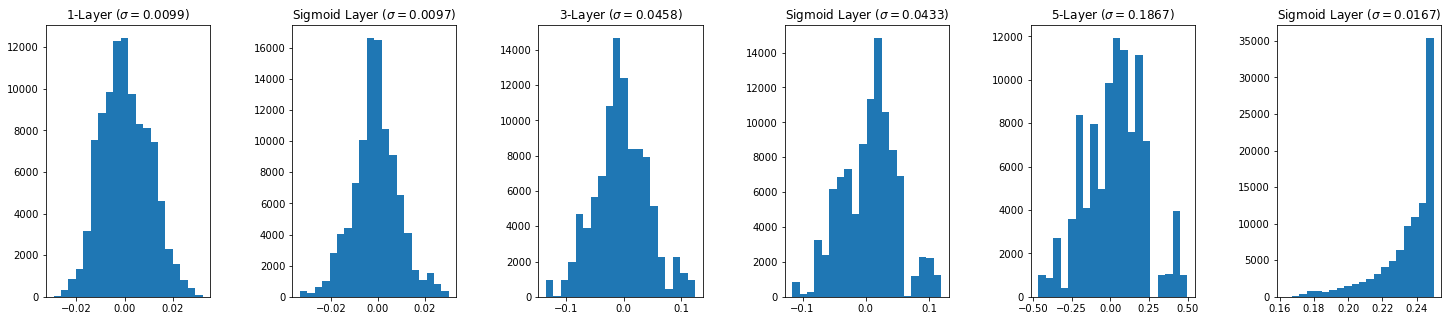

Epoch: 1
Forward Activations


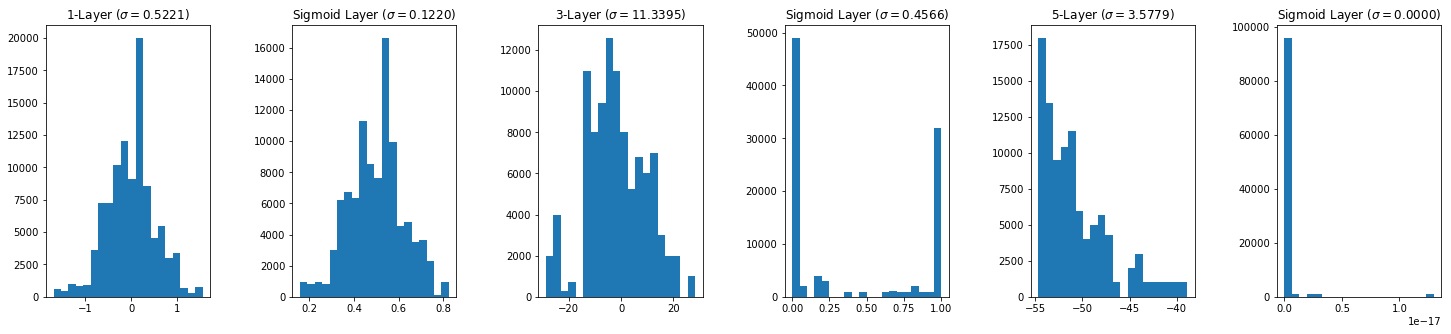

Backward Activations


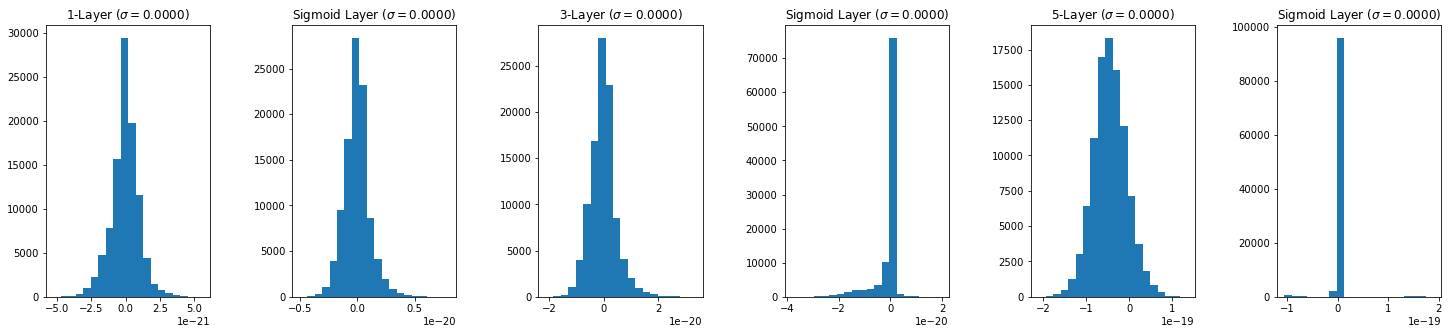

Epoch: 2
Forward Activations


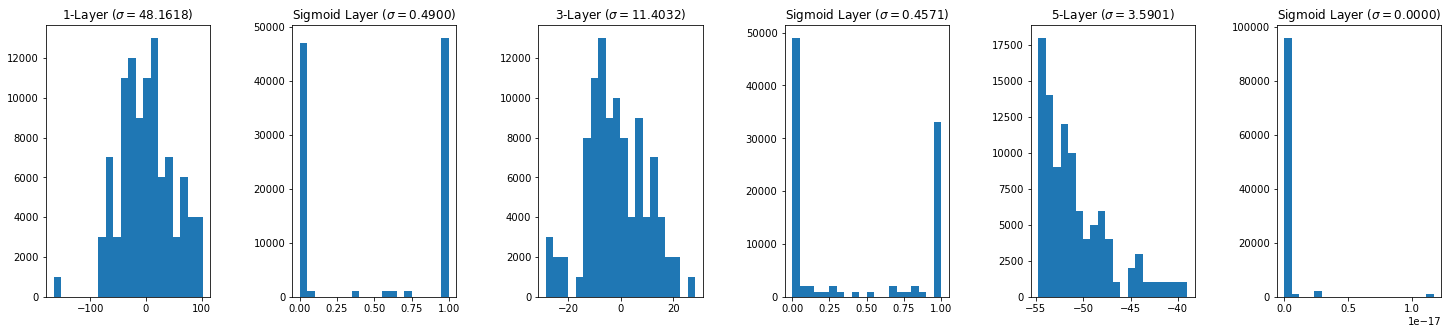

Backward Activations


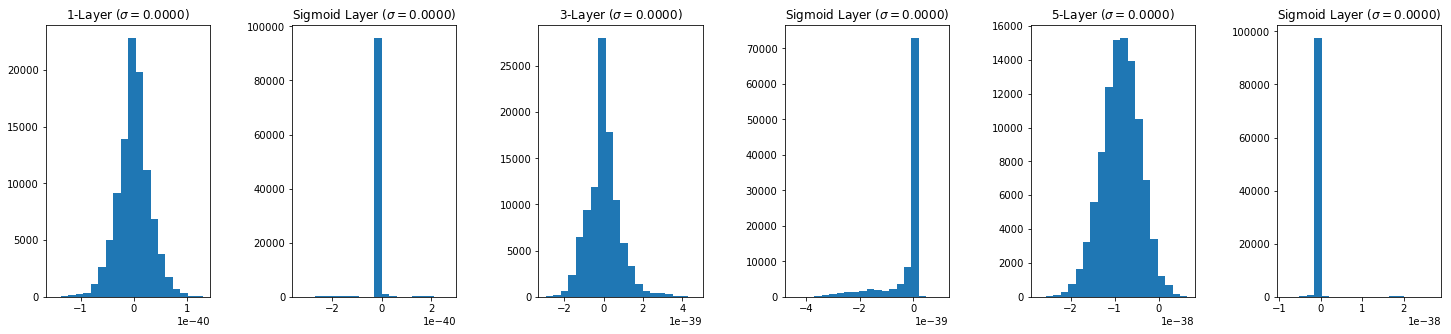

Epoch: 3
Forward Activations


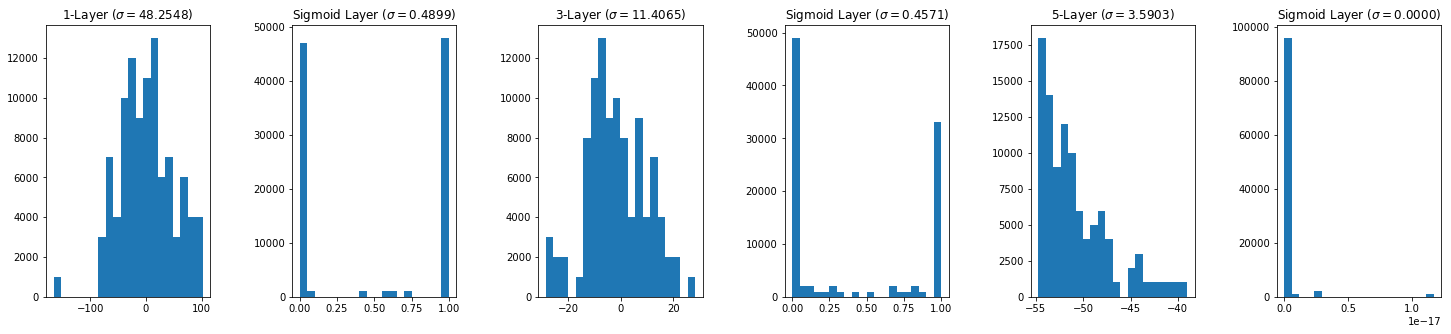

Backward Activations


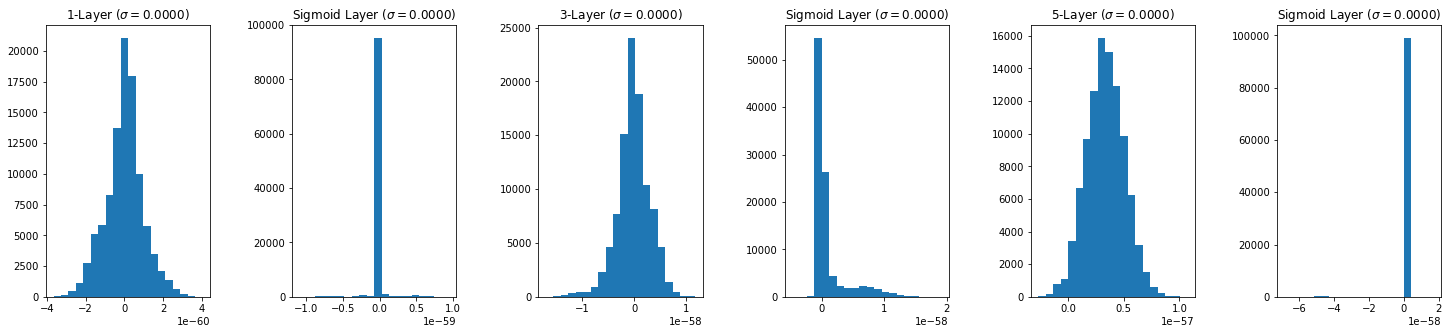

Epoch: 4
Forward Activations


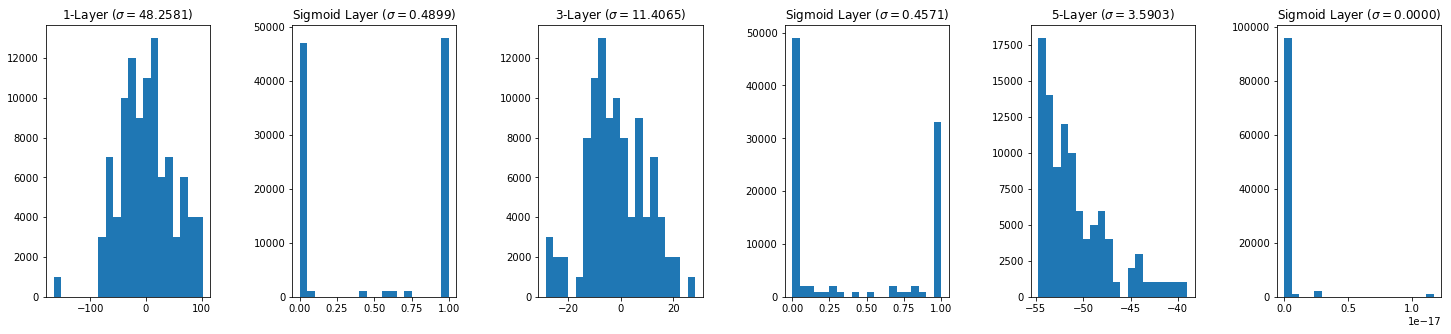

Backward Activations


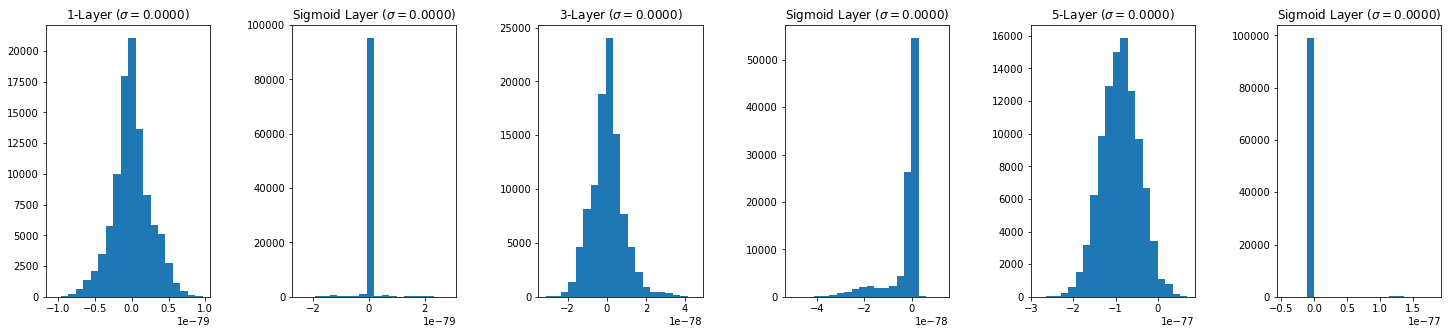

[0.42616666666666664, 2.6696833333333334, 10.6837, 10.699766666666667, 10.700316666666666]
[0.05201666666666666, 0.0, 0.0, 0.0, 0.0]


In [9]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        b = np.random.randn(node_num) / np.sqrt(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Sigmoid()


avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['Xavier'] = avg_forward_std
avg_backward_std_dic['Xavier'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 5) He Initializer where Standard Deviation is $\sqrt{2 \over n}$ ($n$ is the number of neurons in the previous layer)
- Weight Distribution: $W \sim N(0, {2 \over n})$
- Bias Distribution: $B \sim N(0, {2 \over n})$

Epoch: 0
Forward Activations


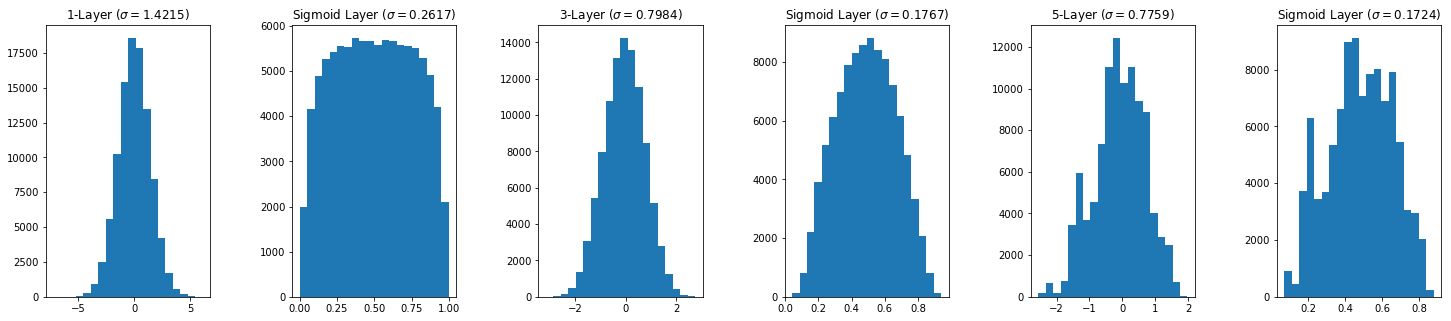

Backward Activations


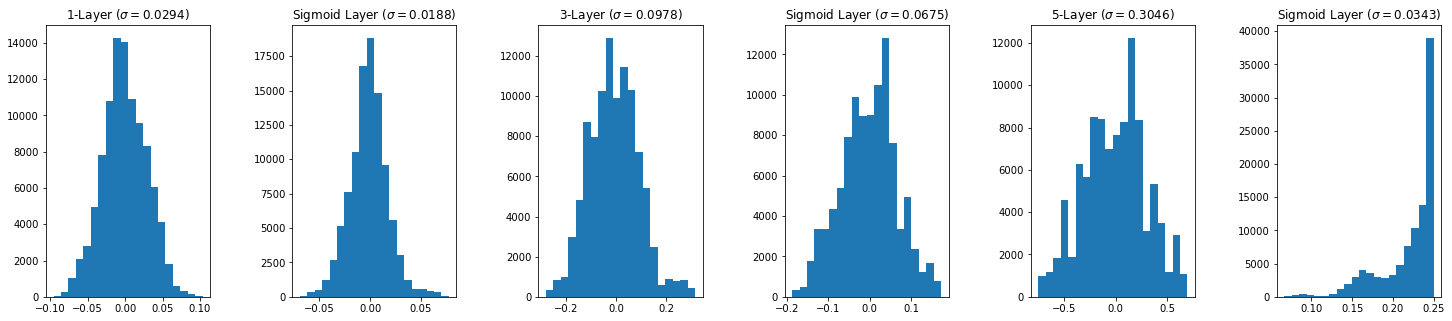

Epoch: 1
Forward Activations


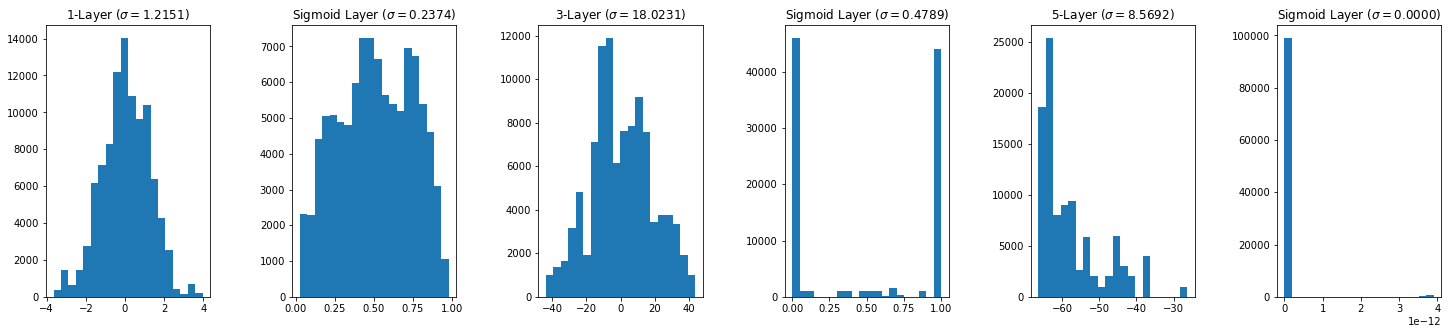

Backward Activations


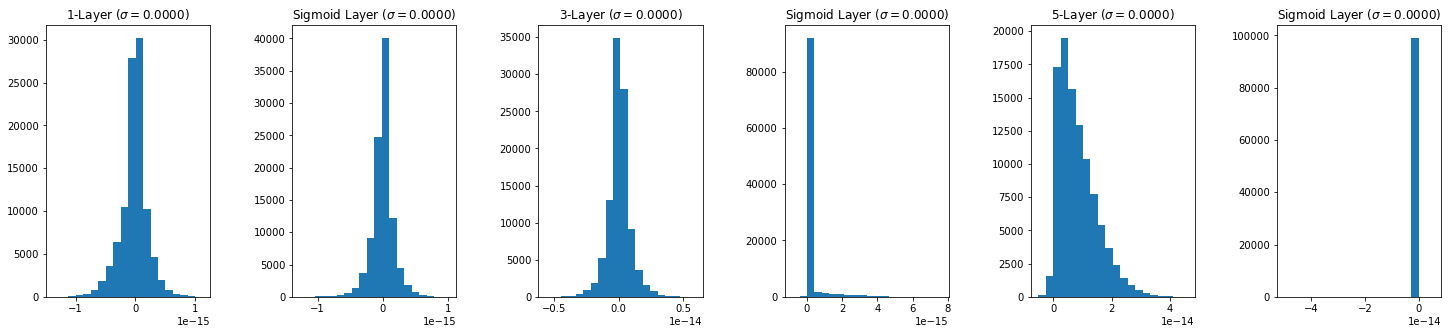

Epoch: 2
Forward Activations


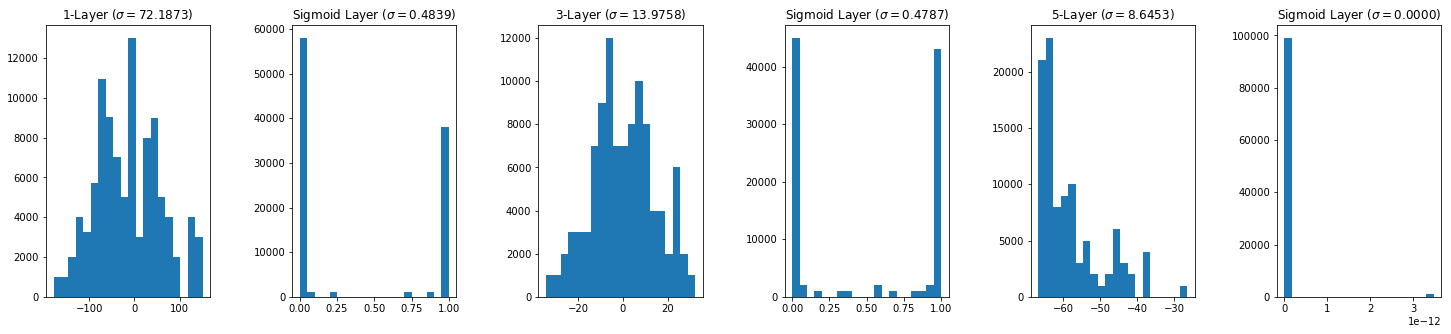

Backward Activations


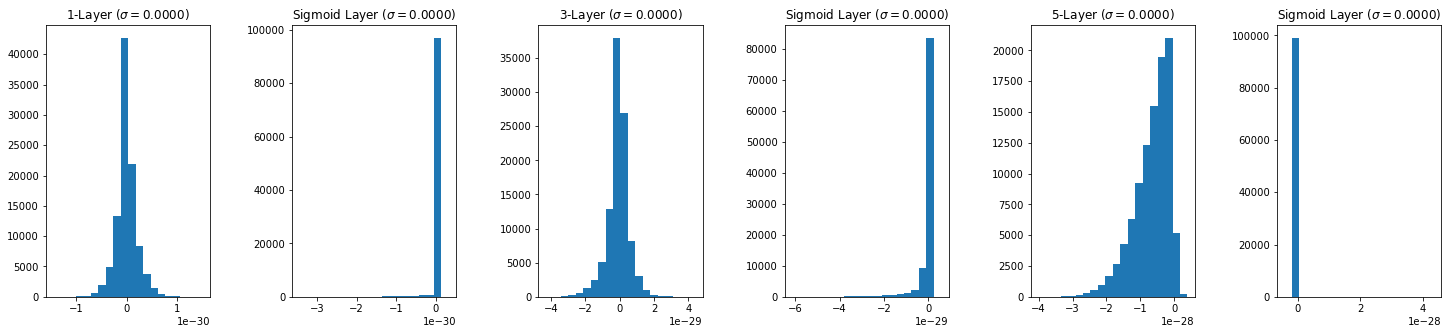

Epoch: 3
Forward Activations


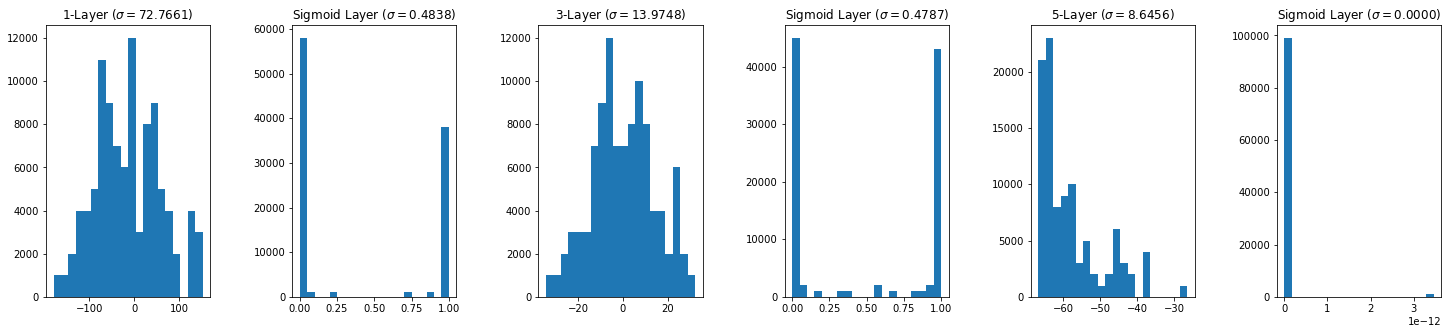

Backward Activations


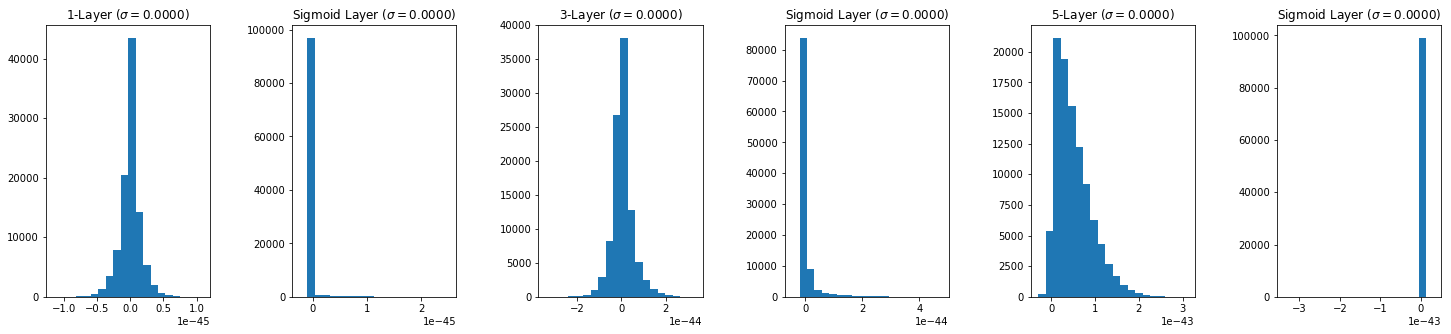

Epoch: 4
Forward Activations


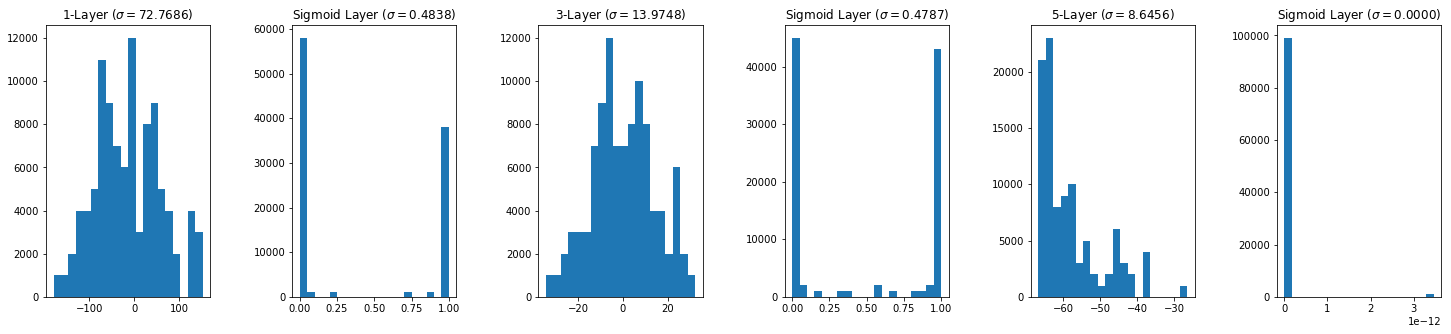

Backward Activations


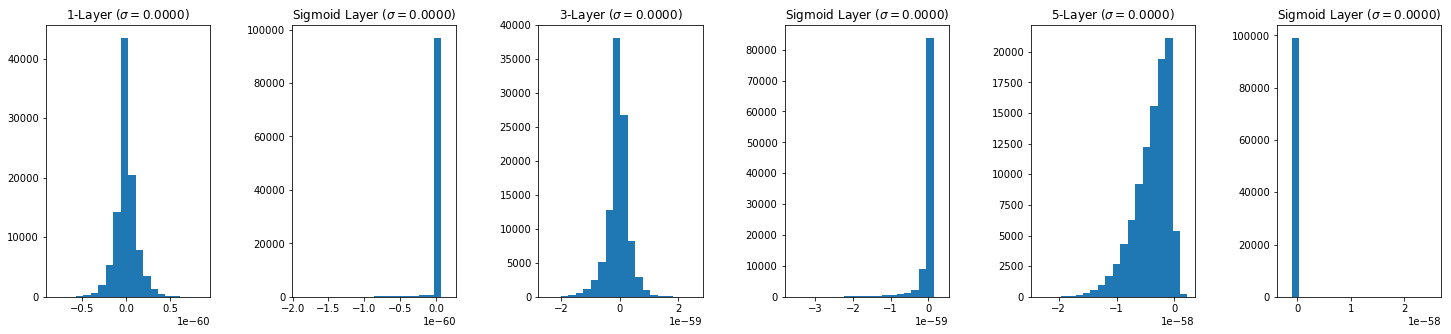

[0.6011000000000001, 4.75395, 15.961833333333333, 16.05816666666667, 16.058583333333335]
[0.09206666666666667, 0.0, 0.0, 0.0, 0.0]


In [10]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num) * np.sqrt(2) / np.sqrt(node_num)
        b = np.random.randn(node_num) * np.sqrt(2)  / np.sqrt(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Sigmoid()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['He'] = avg_forward_std
avg_backward_std_dic['He'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### Standard Deviation of Forward Activation Values per Epoch (0, 1, 2, 3, 4)

In [12]:
import pandas as pd
df = pd.DataFrame(avg_forward_std_dic)
df

,Zero,"N(0.0, 1.0)","N(0.0, 0.0001)",Xavier,He
0,0.0,4.139067,0.040650,0.426167,0.601100
1,0.0,15.408683,0.320617,2.669683,4.753950
2,0.0,48.391933,1.411183,10.683700,15.961833
3,0.0,48.426567,1.412550,10.699767,16.058167
4,0.0,48.898817,1.412550,10.700317,16.058583


### Standard Deviation of Backward Activation Values per Epoch (0, 1, 2, 3, 4)

In [13]:
df = pd.DataFrame(avg_backward_std_dic)
df

,Zero,"N(0.0, 1.0)","N(0.0, 0.0001)",Xavier,He
0,0.0,0.504167,0.005217,0.052017,0.092067
1,0.0,0.009350,0.000000,0.000000,0.000000
2,0.0,0.000050,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000
